In [136]:
import matplotlib.pyplot as plt
import numpy as np

### The LIF Model

#### A membrane equation and a reset condition define our leaky-integreate-and-fire (LIF) neuron:

\begin{align}
\tau_m\,\frac{d}{dt}\,V(t) &= E_{L} - V(t) + R\,I(t) &\text{if }\quad V(t) \leq V_{th} \\ \\
V(t) &= V_{reset} &\text{otherwise}
\end{align}


𝑉(𝑡)  => membrane potential

𝜏𝑚 =>  membrane time constant 

𝐸𝐿 => leak potential 

𝑅 => membrane resistance 

𝐼(𝑡) => synaptic input current

𝑉𝑡ℎ => firing threshold

𝑉𝑟𝑒𝑠𝑒𝑡 => reset voltage. 

𝑉𝑚 => membrane potential, which is more convenient for plot labels.

𝑉(𝑡) => response to synaptic input and leaking of charge across the cell membrane. 

ODE => ordinary differential equation

In [137]:
t_max = 150e-3   # second
dt = 1e-3        # second
tau = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


### Simulating Synaptic Input I(t)

\begin{equation}
I(t)=I_{mean}\left(1+\sin\left(\frac{2 \pi}{0.01}\,t\right)\right)
\end{equation}



$I_{mean}$ => mean current input 

$t$ => time.

In the next cell, you will compute the values of synaptic input $I(t)$ between $t=0$ and $t=0.009$ with step $\Delta t=0.001$.



In [138]:
# Loop for 10 steps, variable 'step' takes values from 0 to 9
for step in range(10):

    # Compute value of t
    t = step * dt

    # Compute value of i at this time step
    i = i_mean *(1+np.sin((2*np.pi/0.01)*t))

    # Print value of i
    print(i)


2.5e-10
3.969463130731183e-10
4.877641290737885e-10
4.877641290737885e-10
3.9694631307311837e-10
2.5000000000000007e-10
1.0305368692688166e-10
1.2235870926211617e-11
1.223587092621159e-11
1.0305368692688186e-10


### Disrete time integration with spikes

We start by writing the time derivative 𝑑/𝑑𝑡𝑉(𝑡) in the membrane equation without taking the limit Δ𝑡→0:

\begin{equation}
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} = E_{L} - V(t) + R\,I(t) \qquad\qquad (1)
\end{equation}



### Simulate Membrane Potential

Compute the values of $V(t)$ between $t=0$ and $t=0.01$ with step $\Delta t=0.001$ and $V(0)=E_L$.


We need to reorganize the Eq. (1) to isolate $V\left(t+\Delta t\right)$ on the left side, and express it as function of $V(t)$ and the other terms:

\begin{equation}
V(t + \Delta t) =  V(t) + \frac{\Delta t}{\tau_m}(E_l -V(t) + R I(t))
\end{equation}



In [139]:
# Initialize step_end and v0

step_end = 10
v = el

for step in range(step_end):
    # Compute value of t
    t = step * dt
    
    # Compute value of i at this time step
    i = i_mean * (1 + np.sin((2*np.pi)/0.01*t))
    
    # Compute v for this time step
    v = v + (dt/tau) * (el - v + r* i)
    
    # Print value of t and v
    print(f"{t:.3f} {v:4e}")

0.000 -5.875000e-02
0.001 -5.682777e-02
0.002 -5.454756e-02
0.003 -5.238136e-02
0.004 -5.077756e-02
0.005 -4.998868e-02
0.006 -4.997398e-02
0.007 -5.041410e-02
0.008 -5.083222e-02
0.009 -5.077534e-02


## Coding Exercise 5: Plotting current

In this exercise, we will plot the values of $I(t)$ between $t=0$ and $t=0.024$.

You will first need to set the title and axis labels of the plot. Label these descriptively!  You will then need to fill out the code to actually create the plot.

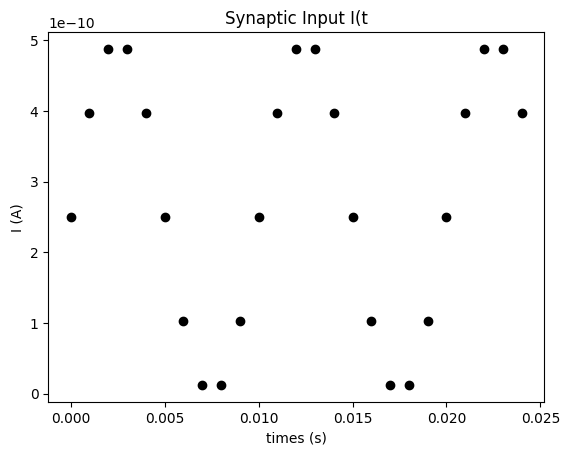

In [140]:
# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title("Synaptic Input I(t")
plt.xlabel("times (s)")
plt.ylabel("I (A)")

for step in range(step_end):
    # Compute value of t
    t = step * dt
    
    # Compute value of i at this time step
    i = i_mean * (1 + np.sin((2*np.pi)/0.01*t))

    # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
    plt.plot(t, i, "ko",)


# Display the plot
plt.show()

## Coding Exercise 6: Plotting membrane potential
Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$. We can compute the number of steps required to get to $t=t_{max}$ given $\Delta t$ as `int(t_max/dt)` where `int` gets the nearest integer.

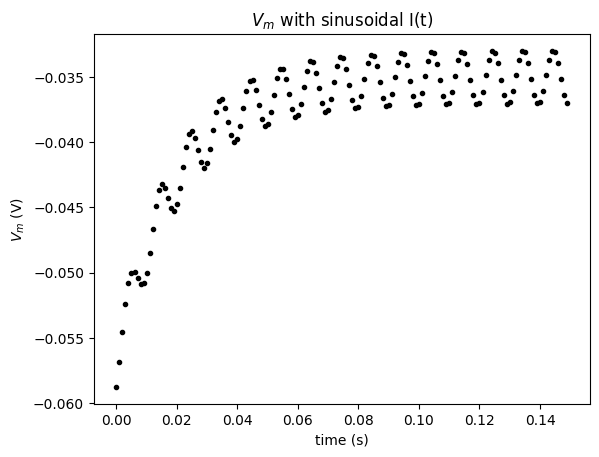

In [141]:
# Initialize step_end
step_end = int(t_max/dt)

# Initialize V0
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):
    # Compute value of t
    t = step * dt
    
    # Compute value of i at this time step
    i = i_mean * (1 + np.sin((2*np.pi)/0.01*t))

    # Compute v
    v = v + (dt/tau) * (el - v + r * i)

    plt.plot(t, v, "k.")

plt.show()

# Section 4: Random synaptic input

From the perspective of neurons, synaptic input is random (or stochastic). We'll improve the synaptic input model by introducing random input current with statistical properties similar to the previous exercise:

\begin{equation}
I(t) = I_{mean}\left(1+0.1\sqrt{\frac{t_{max}}{\Delta t}}\,\xi(t)\right)\qquad\text{with }\xi(t)\sim \mathcal{U}(-1,1)
\end{equation}


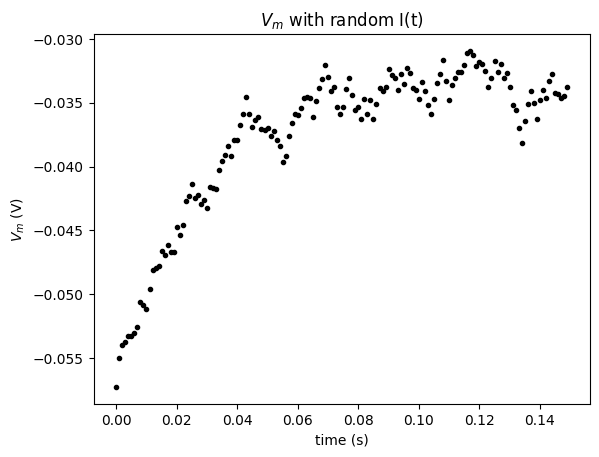

In [142]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and v
step_end = int(t_max/dt)
v = el

# Initialize the figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):
    # Compute value of t
    t = step * dt

    # Get random number in correct range of -1 to 1 (will need to adjust output of np).
    random_num = 2* np.random.random() - 1

    # Compute value of i at this time step
    i = i_mean * (1 + 0.1*(np.sqrt(t_max/dt))*random_num)
    
    # Compute V
    v = v + dt/tau * (el -v + r * i)

    # Plot V (using 'k.' to get eveb smaller markers)
    plt.plot(t,v,'k.')

plt.show()

---
# Section 5: Lists & ensemble statistics


Multiple runs of the previous exercise may give the impression of periodic regularity in the evolution of $V(t)$. We'll collect the sample mean over $N=50$ realizations of $V(t)$  with random input to test such a hypothesis. The sample mean, sample variance and sample autocovariance at times $\left\{t, s\right\}\in[0,t_{max}]$, and for $N$ realizations $V_n(t)$ are given by:

\begin{align}
\\
\left\langle V(t)\right\rangle &= \frac{1}{N}\sum_{n=1}^N V_n(t) & & \text{sample mean}\\
\left\langle (V(t)-\left\langle V(t)\right\rangle)^2\right\rangle &= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2 & & \text{sample variance} \\
\left\langle \left(V(t)-\left\langle V(t)\right\rangle\right)\left(V(s)-\left\langle V(s)\right\rangle\right)\right\rangle
&= \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)\left(V_n(s)-\left\langle V(s)\right\rangle\right) & & \text{sample autocovariance}
\end{align}


## Coding Exercise 8: Storing simulations in lists
Plot multiple simulations ($N=50$) of $V(t)$ by storing in a list the voltage of each neuron at time $t$.

Keep in mind that the plotting command `plt.plot(x, y)` requires `x` to have the same number of elements as `y`.

Mathematical symbols such as $\alpha$ and $\beta$ are specified as `$\alpha$` and `$\beta$` in [TeX markup](https://en.wikipedia.org/wiki/TeX). See additional details in [Writing mathematical expressions](https://matplotlib.org/3.2.2/tutorials/text/mathtext.html) in Matplotlib.

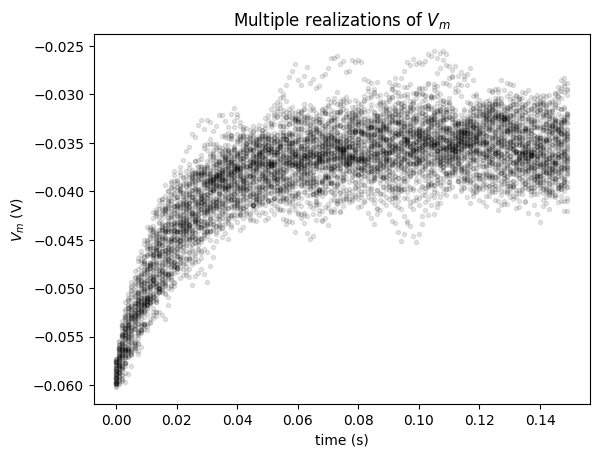

In [143]:
# Set random number generator
np.random.seed(2020)

# Calculate step_end and n
step_end = int(t_max/dt)
n = 50

# Initialize the list v_n with 50 values of membrane leak potential el
v_n = [el] * n 

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

# Loop for step_end steps
for step in range(step_end):

    # Compute value of t
    t = step * dt

    # Loop for n simulations
    for j in range(0,n):

        # Compute value of i at this time step
        i = i_mean * (1 + 0.1*(np.sqrt(t_max/dt))* (2 * np.random.random() -1))

        # Compute value of v for this simulation
        v_n[j] = v_n[j] + dt/tau * (el -v_n[j] + r * i)

    # Plot all simulations 
    plt.plot([t] * n, v_n, 'k.', alpha=0.1)

# Display plot
plt.show()

## Coding Exercise 9: Plotting sample mean

Add the sample mean $\left\langle V(t)\right\rangle=\frac{1}{N}\sum_{n=1}^N V_n(t)$ to the plot.


-0.03538059267973294


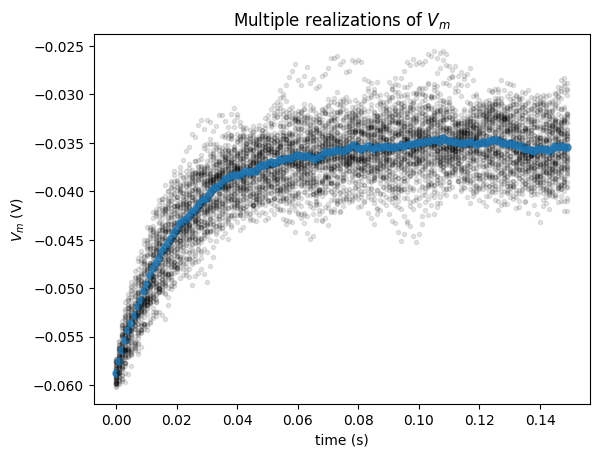

In [144]:
# Set a random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max/dt)
n = 50

# Initialize v_n with the n amount of values with membrane potential el
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

for step in range(step_end):

    # Calculate the value of t
    t = step * dt

    # Look for n simulations
    for j in range(0,n):

         # Compute value of i at this time step
        i = i_mean * (1 + 0.1*(np.sqrt(t_max/dt))* (2 * np.random.random() -1))

        # Compute value of v for this simulation
        v_n[j] = v_n[j] + dt/tau * (el -v_n[j] + r * i)

    # Compute sample mean by summing list of v_n using sum, and dividing by n
    v_mean = sum(v_n) / n
    
    # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t, v_mean, 'C0.', alpha=0.8, markersize=10)

print(v_mean)
plt.show()

## Coding Exercise 10: Plotting sample standard deviation

Add the sample standard deviation $\sigma(t)\equiv\sqrt{\text{Var}\left(t\right)}$ to the plot, with sample variance $\text{Var}(t) = \frac{1}{N-1} \sum_{n=1}^N \left(V_n(t)-\left\langle V(t)\right\rangle\right)^2$.

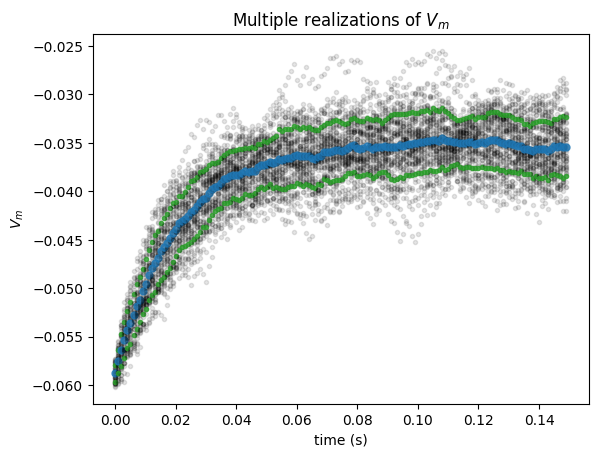

In [212]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end and n
step_end = int(t_max/dt)
n = 50

# Initialize the list v_n with 50 valyes of membrane potential
v_n = [el] * n

# Initialize the figure
plt.figure()
plt.title('Multiple realizations of $V_m$')
plt.xlabel('time (s)')
plt.ylabel('$V_m$')

# Loop for step_end steps
for step in range(step_end):
    # Compute value of t 
    t = step * dt

    # Loop for n simulations
    for j in range(0,n):

        # Compute value of i at this time step
        i = i_mean * (1 + 0.1*(np.sqrt(t_max/dt))* (2 * np.random.random() -1))

        # Compute value of v for this simulation
        v_n[j] = v_n[j] + (dt/tau) * (el - v_n[j] + r * i)

    # Compute sample mean
    v_mean = sum(v_n) / n

    # Initialize a list `v_var_n` with the contribution of each V_n(t) to
    # Var(t) with a list comprehension over values of v_n
    v_var_n = [(v - v_mean)** 2 for v in v_n]

    # Compute sample variance v_var by summing the values of v_var_n with sum and dividing by n-1
    v_var = sum(v_var_n) / (n-1)

    # Compute the standard deviation v_std with the function np.sqrt
    v_std = np.sqrt(v_var)

    # Plot simulations
    plt.plot(n*[t], v_n, 'k.', alpha=0.1)

    # Plot sample mean using alpha=0.8 and'C0.' for blue
    plt.plot(t,v_mean, 'C0.', alpha=0.8, markersize =10)

    # Plot mean + standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean+v_std,'C2.',alpha=0.8)

    # Plot mean - standard deviation with alpha=0.8 and argument 'C7'
    plt.plot(t, v_mean-v_std,'C2.', alpha=0.8)

plt.show()

## Coding Exercise 11: Rewriting with numpy

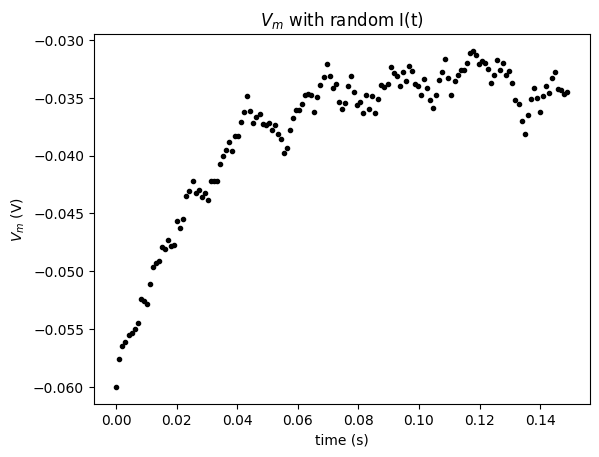

In [231]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, and v
step_end = int(t_max / dt) -1
t_range = np.linspace(0,t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1*(np.sqrt(t_max/dt))* (2 * np.random.random(step_end) -1))

# Loop for step_end steps
for step in range(1,step_end):

    # Compute v as a function of i
    v[step] = v[step-1] + (dt/tau) * (el - v[step-1] + r * i[step])


# Plot membrane potential
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k.')
plt.show()

## Coding Exercise 12: Using enumerate & indexing
Let's practice using `enumerate` to iterate over the indexes and values of the synaptic current array `i`. We want to get the step and the value of i at that step `i_step`


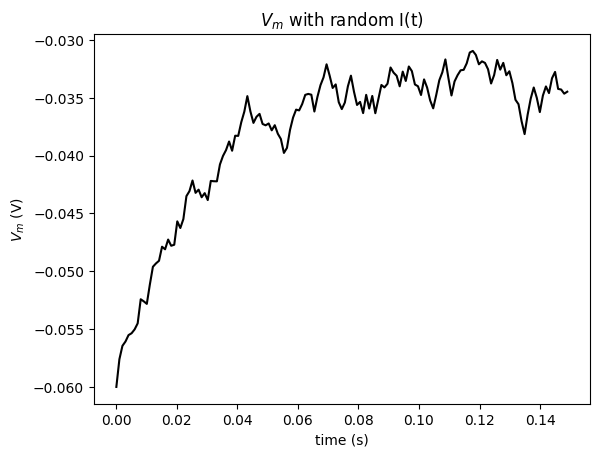

In [244]:
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, v
step_end = int(t_max / dt) - 1
t_range = np.linspace(0, t_max, num=step_end, endpoint=False)
v = el * np.ones(step_end)

# Simulate current over time
i = i_mean * (1 + 0.1 * (t_max/dt) ** (0.5) * (2 * np.random.random(step_end) -1))

# Loop for step_end values of i using enumerate
for step, i_step in enumerate(i):

    # Skip the first iteration
    if step ==0:
        continue

    # Compute v as a function of i using i_step
    v[step] = v[step-1] + (dt/tau) * (el - v[step-1] + r * i_step)

# Plot figure
plt.figure()
plt.title('$V_m$ with random I(t)')
plt.xlabel('time (s)')
plt.ylabel('$V_m$ (V)')

plt.plot(t_range, v, 'k')
plt.show()